In [82]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

# Load the sequential data csv file as a dataframe
df = pd.read_csv('/Users/nikanhassanipak/Library/Mobile Documents/com~apple~CloudDocs/Georgia Tech/Spring 2024/CS 4641/Project/Sequential_format.csv')

In [83]:
# Add a column to df that extracts the base number of each song file (to be used later to ensure that all versions of a song remain on the 
# same side of the train-test split)
df['base_num'] = df['genre'].apply(lambda x: int(x.split('.')[1]))
df['genre'] = df['genre'].apply(lambda x: (x.split('.')[0]))

In [79]:
df

,filename,genre,mfcc1_sample1,mfcc1_sample2,mfcc1_sample3,mfcc1_sample4,mfcc1_sample5,mfcc1_sample6,mfcc1_sample7,mfcc1_sample8,...,spectral7_sample1282,spectral7_sample1283,spectral7_sample1284,spectral7_sample1285,spectral7_sample1286,spectral7_sample1287,spectral7_sample1288,spectral7_sample1289,spectral7_sample1290,base_num
0,reggae.00080_original,reggae,-116.029190,-102.943291,-113.375038,-116.010246,-116.837837,-109.115578,-81.046753,-79.636337,...,14.260842,13.578406,13.342985,13.181918,13.680677,10.615456,12.795183,13.579218,16.357143,80
1,reggae.00080_noisy,reggae,-111.795986,-96.980738,-107.321574,-112.163520,-113.134624,-104.237091,-79.344468,-78.525533,...,14.955124,14.206226,12.804451,13.829266,14.245390,12.294878,13.748911,16.496095,15.890174,80
2,reggae.00080_stretched,reggae,-116.029129,-104.924713,-127.435776,-142.686371,-137.441650,-136.532852,-140.032822,-133.096619,...,16.728583,16.753903,15.716349,16.652128,17.367087,17.603094,16.458706,16.682939,17.559754,80
3,reggae.00080_shifted,reggae,-121.144615,-109.377792,-119.898056,-124.594307,-121.784241,-121.727959,-102.408516,-89.395569,...,67.212013,74.524392,65.813920,63.840065,63.367759,67.302857,65.384033,63.951833,62.752506,80
4,jazz.00016_original,jazz,-245.418533,-232.972672,-257.811829,-272.275238,-275.270294,-276.789795,-278.366119,-282.312775,...,30.184180,30.723996,30.543312,29.909328,32.181333,30.304078,31.077431,31.117528,30.894600,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,jazz.00033_shifted,jazz,-169.769333,-151.757507,-170.000381,-180.288437,-197.664337,-214.293320,-227.959000,-229.809143,...,57.997637,58.743953,57.362698,59.215101,60.568943,61.276837,61.193182,60.482025,59.863790,33
3996,reggae.00099_original,reggae,-129.979935,-55.368382,-0.305676,-3.460715,-63.880615,-145.220367,-122.687813,-87.512535,...,22.926745,23.578320,23.241844,23.738907,35.080055,36.452826,38.002728,36.971474,36.147947,99
3997,reggae.00099_noisy,reggae,-121.926196,-50.993689,0.163142,-3.153372,-60.610422,-128.614657,-108.956707,-76.779711,...,21.787518,21.532588,21.845658,17.947228,16.936011,14.251555,16.042450,16.715687,17.138467,99
3998,reggae.00099_stretched,reggae,-128.180542,-68.776047,-42.349430,-33.482040,-39.989414,-72.657745,-129.232544,-157.831070,...,25.454540,24.546384,27.252233,25.771214,25.992904,22.727350,22.228506,19.142808,17.518300,99


In [80]:
import numpy as np
import pandas as pd

# Total number of feature columns (from column 2 to 50312)
total_feature_cols = 51310

# Number of timesteps/sample moments per feature
num_timesteps = 1290

# Number of features per song (20 MFCC bands, 12 Chroma bands, 7 spectral bands)
num_features = 39

# Initialize a list to store the reshaped features
features_reshaped = []

# Convert the section of the dataframe containing the time series data into a 3D array (num_songs, num_samples_per_feature, num_features)
for i in range(num_features):
    start_col = 2 + i * num_timesteps
    end_col = start_col + num_timesteps
    # Reshape the feature columns to have a shape of (num_samples, num_timesteps)
    feature_data = df.iloc[:, start_col:end_col].values.reshape(-1, num_timesteps)
    features_reshaped.append(feature_data)

# Stack the list of features along a new axis to get a 3D array (now suitable for RNN input)
rnn_input_data = np.stack(features_reshaped, axis=-1)

print(f"RNN Input Data Shape: {rnn_input_data.shape}")
rnn_input_data

RNN Input Data Shape: (4000, 1290, 39)


array([[[-1.16029190e+02, -1.04567535e+02,  5.78729630e+01, ...,
          1.09776282e+01,  2.41018852e+01,  2.14313334e+01],
        [-1.02943291e+02, -1.27420540e+02,  4.51395264e+01, ...,
          1.24884022e+01,  1.88105621e+01,  2.12971019e+01],
        [-1.13375038e+02, -1.79653549e+02,  3.49983215e+01, ...,
          1.50097822e+01,  1.41274912e+01,  2.14258390e+01],
        ...,
        [-1.23698845e+02,  3.71175499e+01, -2.19022293e+01, ...,
          2.60817262e+01,  2.08341927e+01,  1.27951828e+01],
        [-1.13657013e+02,  5.46119423e+01, -1.15714531e+01, ...,
          2.85595079e+01,  2.24027129e+01,  1.35792185e+01],
        [-1.02933838e+02,  6.59972076e+01, -5.78723764e+00, ...,
          3.10617478e+01,  2.20866156e+01,  1.63571433e+01]],

       [[-1.11795986e+02, -1.01945631e+02,  5.18100791e+01, ...,
          1.11721654e+01,  2.23471059e+01,  2.13681330e+01],
        [-9.69807375e+01, -1.23026594e+02,  4.29971845e+01, ...,
          1.28227062e+01,  1.91618688e

In [85]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Define callback for tracking per-epoch training and validation metrics
class MetricsCallback(Callback):
    def __init__(self):
        super().__init__()
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []

    def on_epoch_end(self, epoch, logs=None):
        self.train_loss.append(logs['loss'])
        self.val_loss.append(logs['val_loss'])
        self.train_acc.append(logs['accuracy'])
        self.val_acc.append(logs['val_accuracy'])

# Encode labels
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse=False)
genre_labels = df['genre'].values
integer_encoded = label_encoder.fit_transform(genre_labels)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded.reshape(-1, 1))

# Map base_num to indices in df (thereby indirectly mapping it to rnn_input_data for proper indexing of train-test split to avoid data leakage)
base_num_to_indices = {bn: df[df['base_num'] == bn].index.to_numpy() for bn in df['base_num'].unique()}
unique_base_nums = df['base_num'].unique()

/Users/nikanhassanipak/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Fold 1/5
Epoch 1/50
100/100 [==============================] - 28s 271ms/step - loss: 18.0376 - accuracy: 0.1647 - val_loss: 9.3906 - val_accuracy: 0.2550 - lr: 5.0000e-04
Epoch 2/50
100/100 [==============================] - 27s 272ms/step - loss: 6.0987 - accuracy: 0.2491 - val_loss: 3.8674 - val_accuracy: 0.2700 - lr: 5.0000e-04
Epoch 3/50
100/100 [==============================] - 27s 269ms/step - loss: 2.9910 - accuracy: 0.3278 - val_loss: 2.4808 - val_accuracy: 0.3212 - lr: 5.0000e-04
Epoch 4/50
100/100 [==============================] - 27s 272ms/step - loss: 2.1483 - accuracy: 0.3666 - val_loss: 2.0770 - val_accuracy: 0.3288 - lr: 5.0000e-04
Epoch 5/50
100/100 [==============================] - 27s 274ms/step - loss: 1.8840 - accuracy: 0.4066 - val_loss: 1.9536 - val_accuracy: 0.3500 - lr: 5.0000e-04
Epoch 6/50
100/100 [==============================] - 27s 272ms/step - loss: 1.7528 - accuracy: 0.4447 - val_loss: 1.9030 - val_accuracy: 0.3925 - lr: 5.0000e-04
Epoch 7/50
100/100

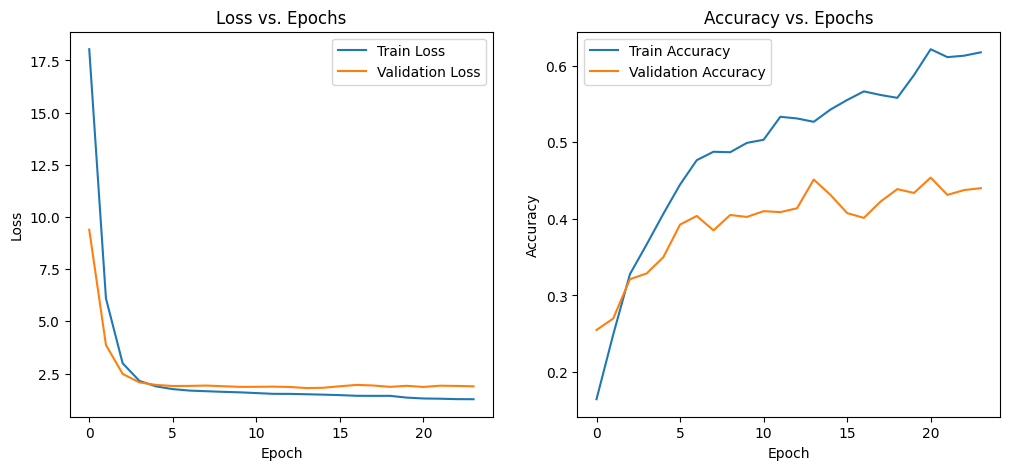

Fold 2/5
Epoch 1/50
100/100 [==============================] - 28s 268ms/step - loss: 18.1483 - accuracy: 0.1403 - val_loss: 9.5098 - val_accuracy: 0.2625 - lr: 5.0000e-04
Epoch 2/50
100/100 [==============================] - 26s 264ms/step - loss: 6.1584 - accuracy: 0.2247 - val_loss: 3.8707 - val_accuracy: 0.2550 - lr: 5.0000e-04
Epoch 3/50
100/100 [==============================] - 26s 264ms/step - loss: 3.0319 - accuracy: 0.2984 - val_loss: 2.3872 - val_accuracy: 0.3713 - lr: 5.0000e-04
Epoch 4/50
100/100 [==============================] - 26s 264ms/step - loss: 2.1863 - accuracy: 0.3456 - val_loss: 1.9959 - val_accuracy: 0.3700 - lr: 5.0000e-04
Epoch 5/50
100/100 [==============================] - 26s 264ms/step - loss: 1.9509 - accuracy: 0.3669 - val_loss: 1.8135 - val_accuracy: 0.4013 - lr: 5.0000e-04
Epoch 6/50
100/100 [==============================] - 26s 264ms/step - loss: 1.8318 - accuracy: 0.3978 - val_loss: 1.7956 - val_accuracy: 0.3825 - lr: 5.0000e-04
Epoch 7/50
100/100

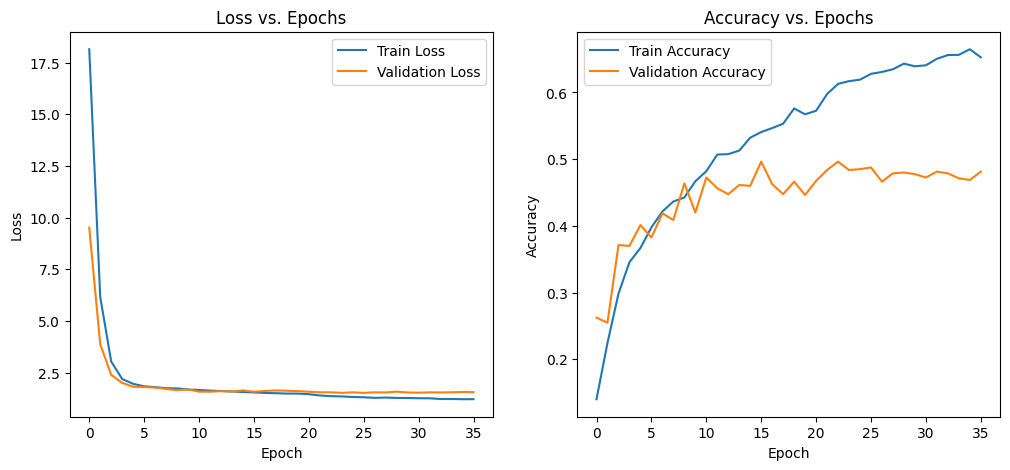

Fold 3/5
Epoch 1/50
100/100 [==============================] - 28s 270ms/step - loss: 18.1728 - accuracy: 0.1369 - val_loss: 9.5899 - val_accuracy: 0.2300 - lr: 5.0000e-04
Epoch 2/50
100/100 [==============================] - 26s 264ms/step - loss: 6.1827 - accuracy: 0.2275 - val_loss: 3.9599 - val_accuracy: 0.2775 - lr: 5.0000e-04
Epoch 3/50
100/100 [==============================] - 26s 264ms/step - loss: 3.0380 - accuracy: 0.2966 - val_loss: 2.4589 - val_accuracy: 0.3262 - lr: 5.0000e-04
Epoch 4/50
100/100 [==============================] - 26s 264ms/step - loss: 2.2027 - accuracy: 0.3475 - val_loss: 2.1041 - val_accuracy: 0.3350 - lr: 5.0000e-04
Epoch 5/50
100/100 [==============================] - 27s 266ms/step - loss: 1.9334 - accuracy: 0.3847 - val_loss: 1.9753 - val_accuracy: 0.3650 - lr: 5.0000e-04
Epoch 6/50
100/100 [==============================] - 26s 261ms/step - loss: 1.8166 - accuracy: 0.4153 - val_loss: 1.9284 - val_accuracy: 0.4150 - lr: 5.0000e-04
Epoch 7/50
100/100

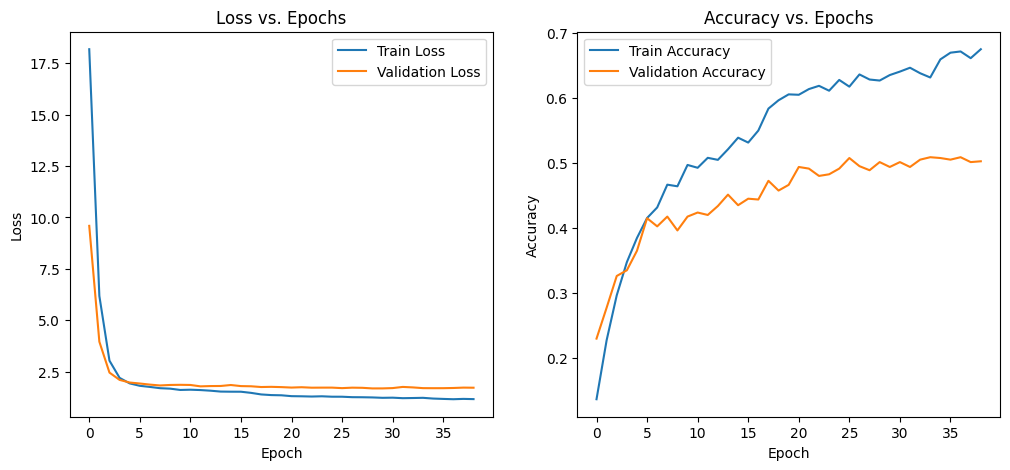

Fold 4/5
Epoch 1/50
100/100 [==============================] - 28s 271ms/step - loss: 18.0735 - accuracy: 0.1625 - val_loss: 9.4798 - val_accuracy: 0.2450 - lr: 5.0000e-04
Epoch 2/50
100/100 [==============================] - 26s 260ms/step - loss: 6.1193 - accuracy: 0.2497 - val_loss: 3.8971 - val_accuracy: 0.3325 - lr: 5.0000e-04
Epoch 3/50
100/100 [==============================] - 26s 260ms/step - loss: 3.0029 - accuracy: 0.3250 - val_loss: 2.4539 - val_accuracy: 0.3875 - lr: 5.0000e-04
Epoch 4/50
100/100 [==============================] - 26s 261ms/step - loss: 2.1918 - accuracy: 0.3653 - val_loss: 2.0432 - val_accuracy: 0.4288 - lr: 5.0000e-04
Epoch 5/50
100/100 [==============================] - 26s 261ms/step - loss: 1.8910 - accuracy: 0.4131 - val_loss: 1.9173 - val_accuracy: 0.3925 - lr: 5.0000e-04
Epoch 6/50
100/100 [==============================] - 26s 261ms/step - loss: 1.7892 - accuracy: 0.4394 - val_loss: 1.8510 - val_accuracy: 0.4300 - lr: 5.0000e-04
Epoch 7/50
100/100

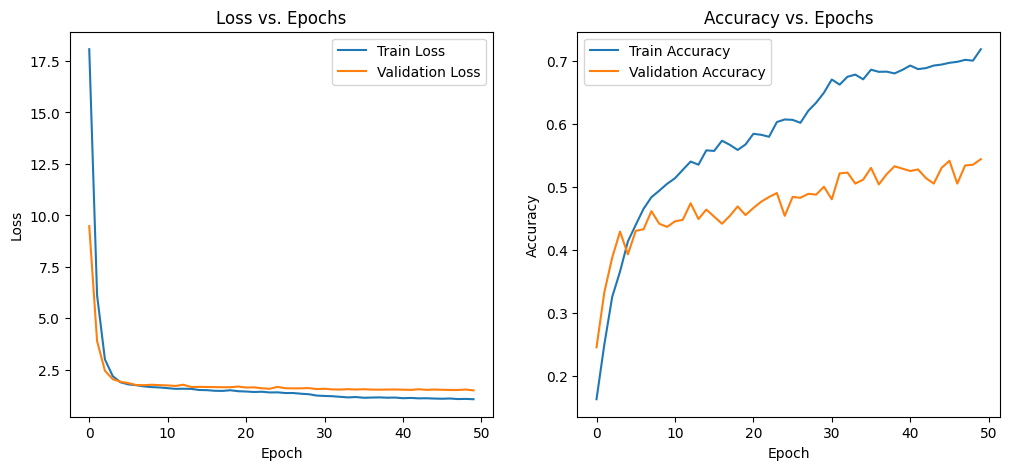

Fold 5/5
Epoch 1/50
100/100 [==============================] - 28s 265ms/step - loss: 18.1799 - accuracy: 0.1506 - val_loss: 9.5559 - val_accuracy: 0.2325 - lr: 5.0000e-04
Epoch 2/50
100/100 [==============================] - 26s 261ms/step - loss: 6.1904 - accuracy: 0.2459 - val_loss: 3.9614 - val_accuracy: 0.2663 - lr: 5.0000e-04
Epoch 3/50
100/100 [==============================] - 26s 261ms/step - loss: 3.0642 - accuracy: 0.3050 - val_loss: 2.4811 - val_accuracy: 0.3063 - lr: 5.0000e-04
Epoch 4/50
100/100 [==============================] - 26s 261ms/step - loss: 2.2091 - accuracy: 0.3584 - val_loss: 2.0749 - val_accuracy: 0.3475 - lr: 5.0000e-04
Epoch 5/50
100/100 [==============================] - 26s 261ms/step - loss: 1.9408 - accuracy: 0.3906 - val_loss: 1.9266 - val_accuracy: 0.4025 - lr: 5.0000e-04
Epoch 6/50
100/100 [==============================] - 26s 261ms/step - loss: 1.8412 - accuracy: 0.4141 - val_loss: 1.8219 - val_accuracy: 0.4013 - lr: 5.0000e-04
Epoch 7/50
100/100

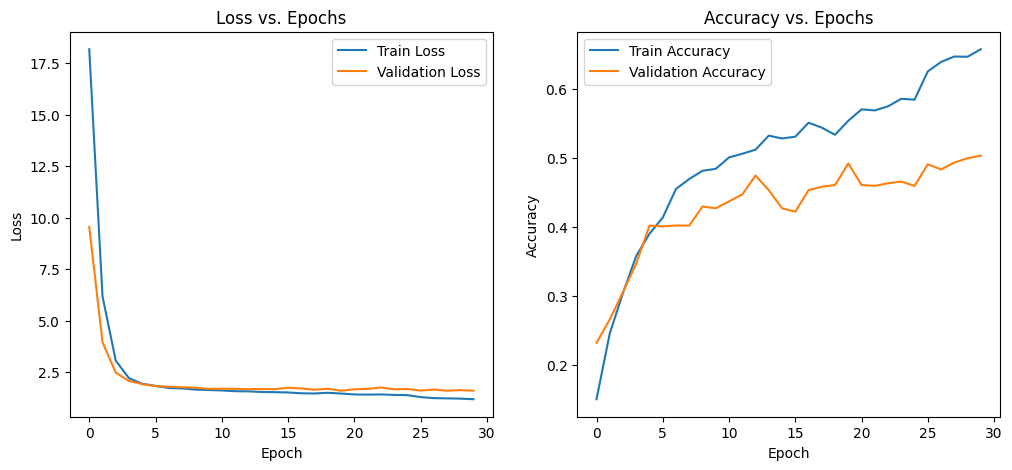

Average classification report:
blues: Precision: 0.16778063096111517, Recall: 0.13999999999999999, F1-Score: 0.14312435044669025
classical: Precision: 0.8193679708589487, Recall: 0.9099999999999999, F1-Score: 0.8577066557295311
country: Precision: 0.375066889632107, Recall: 0.5275000000000001, F1-Score: 0.4368450390189521
disco: Precision: 0.34965603664333245, Recall: 0.2225, F1-Score: 0.24318035486976292
hiphop: Precision: 0.4515016722408027, Recall: 0.4600000000000001, F1-Score: 0.4495567794199552
jazz: Precision: 0.5689853691251479, Recall: 0.6, F1-Score: 0.5766172351376502
metal: Precision: 0.7682646096306686, Recall: 0.8099999999999999, F1-Score: 0.7845637361416493
pop: Precision: 0.5762792149399552, Recall: 0.7825, F1-Score: 0.6562275481845428
reggae: Precision: 0.3891055600417452, Recall: 0.33749999999999997, F1-Score: 0.35610394202571
rock: Precision: 0.38404379126412774, Recall: 0.1625, F1-Score: 0.20098458954223175


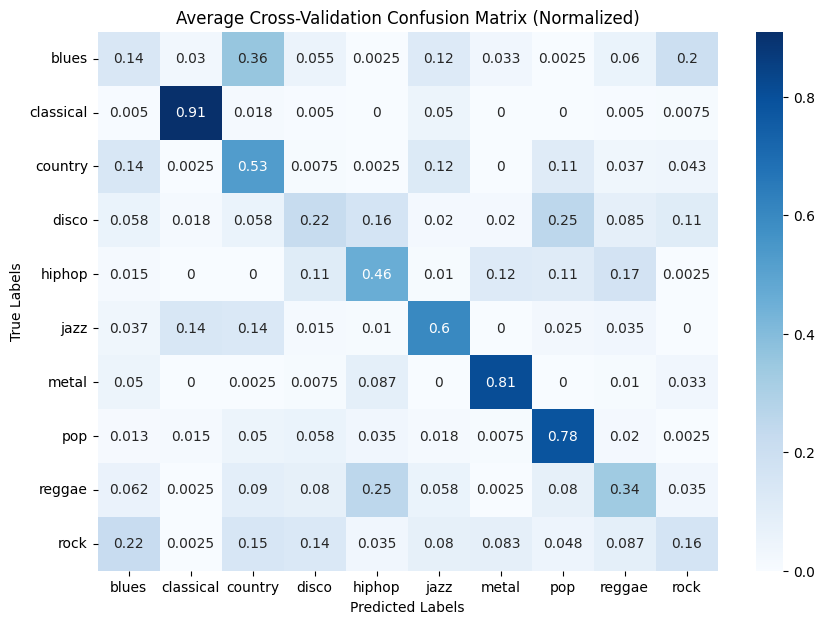


Average Model Accuracy: 0.49524999999999997
Standard Deviation of Fold Accuracies: 2.963739192304207%


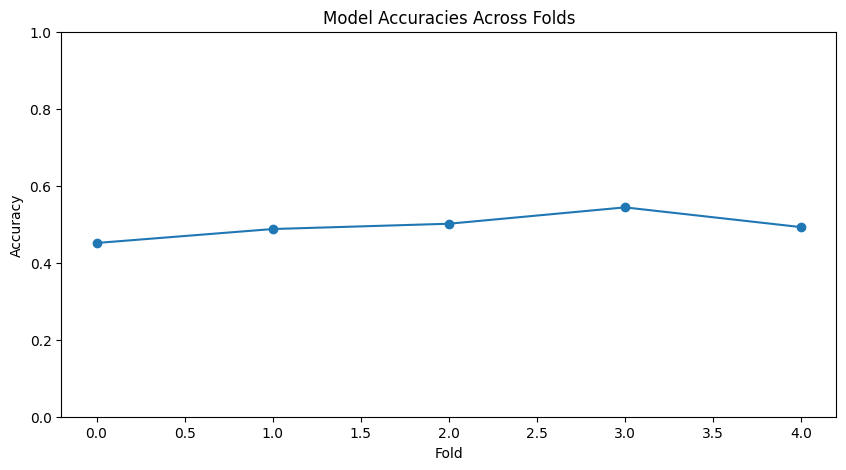

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import seaborn as sns

# Initialize the lists that will hold the performance metrics and confusion matrix for each fold
num_classes = len(np.unique(df['genre']))
results = []
accuracies = []
aggregated_cm = np.zeros((num_classes, num_classes))

# Loop through each fold, defining the training and testing indices based on the 'base_num' index. Then train a LSTM model and 
# extract the model accuracy, precision, recall, and F1-score for each genre, as well as the confusion matrix for that fold.
# Then append metrics to their respective lists
num_folds = 5
fold_size = len(unique_base_nums) // num_folds

for fold in range(num_folds):
    print(f"Fold {fold+1}/{num_folds}")
    # Define train and test indices for 'base_num'
    start_index = fold * fold_size
    end_index = start_index + fold_size 

    test_base_nums = unique_base_nums[start_index:end_index]
    train_base_nums = np.concatenate([unique_base_nums[:start_index], unique_base_nums[end_index:]])

    # Split the dataset for the current fold
    train_indices = np.concatenate([base_num_to_indices[bn] for bn in train_base_nums])
    test_indices = np.concatenate([base_num_to_indices[bn] for bn in test_base_nums])

    X_train, X_test = rnn_input_data[train_indices], rnn_input_data[test_indices]
    y_train, y_test = onehot_encoded[train_indices], onehot_encoded[test_indices]

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
    X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

    # Define the RNN model and structure
    model = Sequential([
        Conv1D(128, 3, activation='relu', input_shape=(num_timesteps, num_features)),
        MaxPooling1D(2),
        Dropout(0.7),
        Conv1D(64, 3, activation='relu'),
        MaxPooling1D(2),
        Dropout(0.7),
        LSTM(128, kernel_regularizer=l2(0.06), recurrent_regularizer=l2(0.06), return_sequences=True),
        Dropout(0.7),
        LSTM(64, kernel_regularizer=l2(0.06), recurrent_regularizer=l2(0.06)),
        Dropout(0.7),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model, adding in early stopping and ReduceLROnPlateau to save computation time
    history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, 
                        validation_data=(X_test_scaled, y_test), 
                        callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True), 
                        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)])

    # Make predictions with model
    y_pred = model.predict(X_test_scaled)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_test_labels = np.argmax(y_test, axis=1)

    # Compute the confusion matrix for this fold and add it towards the aggregated confusion matrix
    cm = confusion_matrix(y_test_labels, y_pred_labels)
    aggregated_cm += cm

    # Collect the precision, recall, and F1-score for each genre for this fold and append it to the results list
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test_labels, y_pred_labels, average=None, labels=np.arange(num_classes))
    results.append((precision, recall, fscore))
    accuracies.append(accuracy_score(y_test_labels, y_pred_labels))
    
    # Plot training and validation loss and accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss vs. Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy vs. Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Calculate the average metrics across all 5 folds
avg_precision = np.mean([result[0] for result in results], axis=0)
avg_recall = np.mean([result[1] for result in results], axis=0)
avg_fscore = np.mean([result[2] for result in results], axis=0)
avg_accuracy = np.mean(accuracies)

# Calculate the average confusion matrix across all 5 folds (normalized across each row)
avg_cm = aggregated_cm.astype('float') / aggregated_cm.sum(axis=1)[:, np.newaxis]

# Extract all 10 genres from the dataframe
labels = np.unique(df['genre'])

# Print average results of the 5-fold cross validation
print('Average classification report:')
for i, label in enumerate(labels):
    print(f'{label}: Precision: {avg_precision[i]}, Recall: {avg_recall[i]}, F1-Score: {avg_fscore[i]}')

# Plot the average normalized confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(avg_cm, annot=True, xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Average Cross-Validation Confusion Matrix (Normalized)')
plt.show()

# Average and standard deviation of accuracies
average_accuracy = np.mean(accuracies)
std_deviation = np.std(accuracies)
print(f'\nAverage Model Accuracy: {avg_accuracy}')
print(f'Standard Deviation of Fold Accuracies: {std_deviation*100}%')

# Plot the model accuracies across the 5 folds
plt.figure(figsize=(10, 5))
plt.plot(accuracies, label='Fold Accuracies', marker='o')
plt.title('Model Accuracies Across Folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

